<a href="https://colab.research.google.com/github/vishnaka-dasanayaka/Image_processing/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the intensity level (power of 2): 32


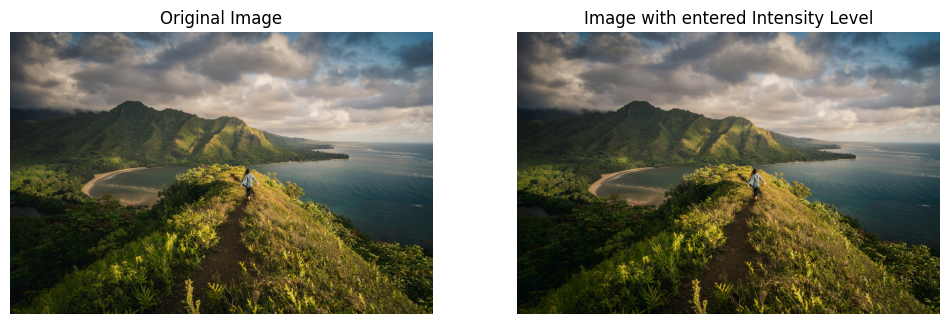

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def intensityReducer(imgArr, value):
    factor = 256 // value
    finalImg = (imgArr // factor) * factor
    return finalImg

imgLocation = "test.jpg"
image = Image.open(imgLocation)
imgArr = np.array(image)

value = int(input("Enter the intensity level (power of 2): "))

if value & (value - 1) != 0:
    print("The input should be a power of 2.")
else:
    finalImg = intensityReducer(imgArr, value)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(imgArr, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(finalImg, cmap='gray')
    axes[1].set_title('Image with entered Intensity Level')
    axes[1].axis('off')
    plt.show()


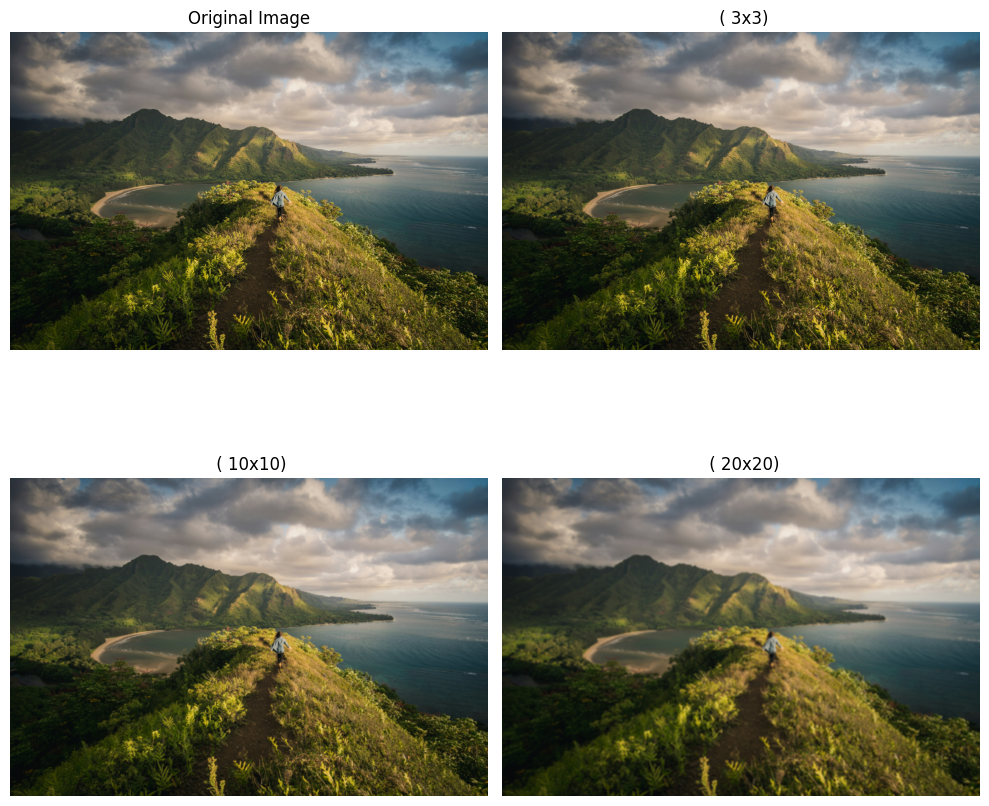

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def averageFilter(img, kernelSize):
    return cv2.blur(img, (kernelSize, kernelSize))

imagePath = "test.jpg"
img = cv2.imread(imagePath)

if img is None:
    print("Error: Unable to load the image.")
else:
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for i, kernelSize in enumerate([3, 10, 20]):
        row = (i + 1) // 2
        col = (i + 1) % 2
        filteredImage = averageFilter(img, kernelSize)
        axes[row, col].imshow(cv2.cvtColor(filteredImage, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f' ( {kernelSize}x{kernelSize})')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


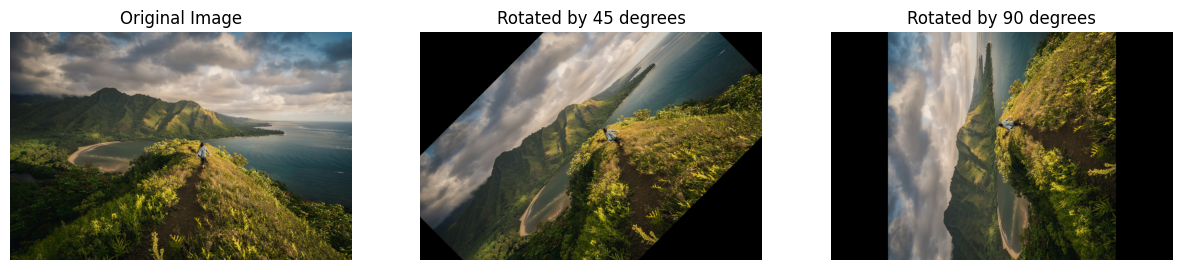

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imgLocation = "test.jpg"
img = cv2.imread(imgLocation)

if img is None:
    print("Error: Unable to load the image.")
else:
    # Rotate by 45 degrees
    rows, cols = img.shape[:2]
    M45 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_45 = cv2.warpAffine(img, M45, (cols, rows))

    # Rotate by 90 degrees
    M90 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
    rotated_90 = cv2.warpAffine(img, M90, (cols, rows))



    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Rotated by 45 degrees')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Rotated by 90 degrees')
    axes[2].axis('off')

    plt.show()


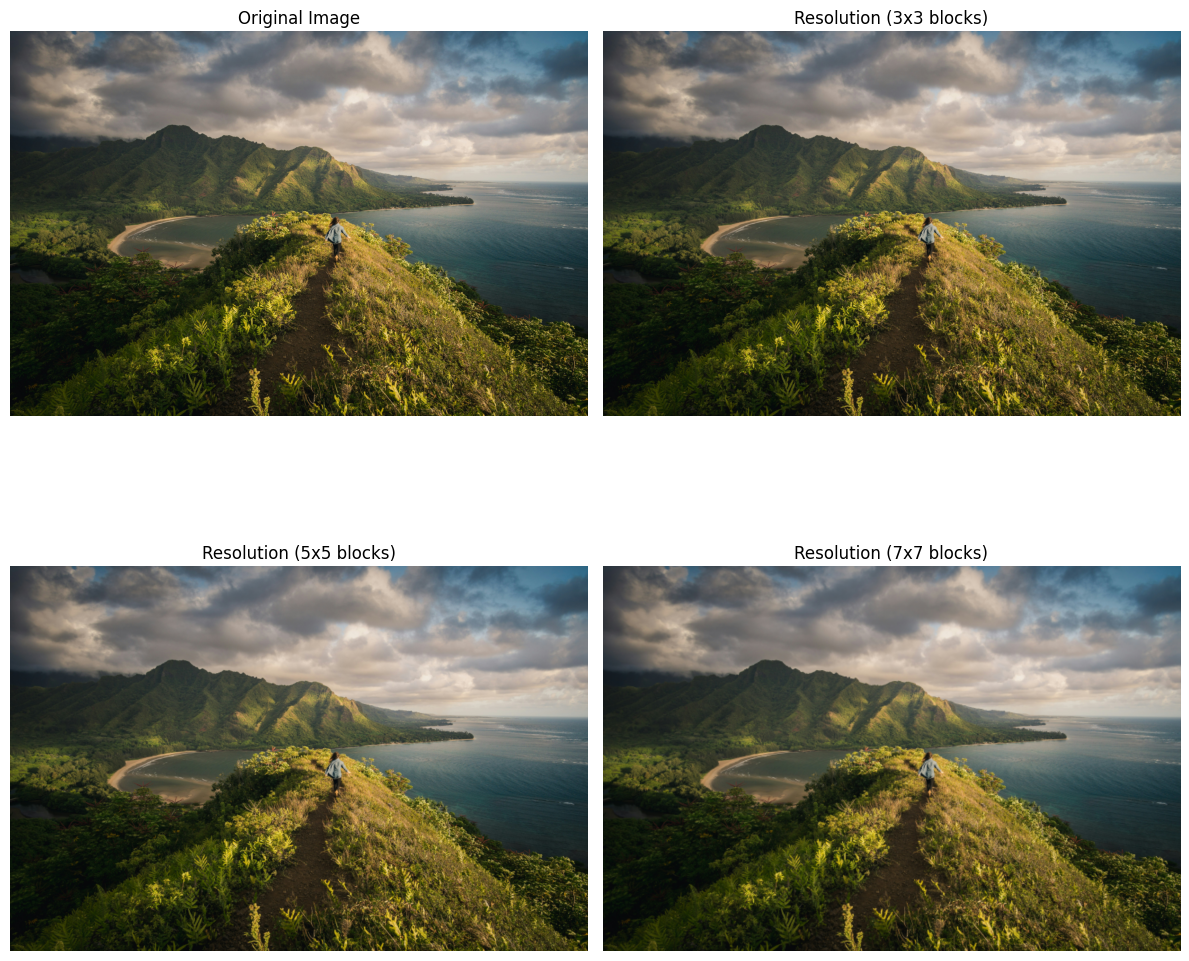

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resolutionReducer(img, size):
    reducedImage = np.zeros_like(img)
    rows, cols = img.shape[:2]
    for i in range(0, rows, size):
        for j in range(0, cols, size):
            block = img[i:i+size, j:j+size]
            average_color = np.mean(block, axis=(0, 1))
            reducedImage[i:i+size, j:j+size] = average_color
    return reducedImage

imgLocation = "test.jpg"
img = cv2.imread(imgLocation)

if img is None:
    print("Error: Unable to load image.")
else:
    reducedImage_3x3 = resolutionReducer(img, 3)
    reducedImage_5x5 = resolutionReducer(img, 5)
    reducedImage_7x7 = resolutionReducer(img, 7)

    # Display
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(cv2.cvtColor(reducedImage_3x3, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Resolution (3x3 blocks)')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(cv2.cvtColor(reducedImage_5x5, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Resolution (5x5 blocks)')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(cv2.cvtColor(reducedImage_7x7, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Resolution (7x7 blocks)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()
